    \item (Only for $H_2$) HEA, L-BFGS-B optimizer, Parity mapping, 2 qubit reduction, IBM Quantum hardware \begin{verbatim}ibm_brisbane\end{verbatim},

        \item circuit depth,
    \item gate fidelity,
    \item parameter count,
    \item TRAINABILITY,
    \item EXPRESSIBILITY.

     $H_2$ molecule.

     \item converged ground state energy graph, depending on the inter-atomic distance,
\item accuracy, with reference of FCI calculations, absolute error (\parencite{sims2006high}), depending on the inter-atomic distance,
\item number of iterations needed to achieve convergence (gradient tolerance is $10^{-5}$), depending on the inter-atomic distance,
\item for one inter-atomic distance, graph of convergence,
\item runtime, depending on the inter-atomic distance.


In [9]:
from lib.utils import make_hydrogen_hea, h2_hamiltonian_parity
import time
from qiskit_algorithms.optimizers import L_BFGS_B
import numpy as np
from matplotlib import pyplot as plt
from qiskit.primitives import StatevectorEstimator

## Aer simulator

In [10]:
optimizer = L_BFGS_B()
estimator = StatevectorEstimator()

In [11]:
ansatz = make_hydrogen_hea()
print(ansatz)

start = time.time()
hamiltonian_example = h2_hamiltonian_parity(distance=0.735)
end = time.time()
print(f"{0.735} case took time to make:", end - start)
print(hamiltonian_example)

     ┌────────┐     
q_0: ┤ Ry(θ1) ├──■──
     ├────────┤┌─┴─┐
q_1: ┤ Ry(θ2) ├┤ X ├
     └────────┘└───┘
0.735 case took time to make: 0.34645605087280273
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


In [13]:
# SIMULATOR
distances=[0.1, 0.2, 0.5, 0.735, 1.0, 1.5, 2.0, 3.0, 4.0]
initial_point = np.zeros(ansatz.num_parameters)
iterations = [[] for _ in range(len(distances))]
runtimes=[]
energies=[]

for i in range(len(distances)):
    qubit_hamiltonian = h2_hamiltonian_parity(distance=distances[i])
    def estimate_energy(parameters):
        job = estimator.run(
            [(ansatz, qubit_hamiltonian, parameters)]
        )
        result = job.result()[0].data.evs
        iterations[i].append(result)
        return result

    initial_point = np.zeros(ansatz.num_parameters)
    start = time.perf_counter()
    result = optimizer.minimize(fun=estimate_energy, x0=initial_point)
    end = time.perf_counter()
    runtimes.append(end - start)
    energies.append(result.fun)

[-0.7051589254466095, -0.8059544241595064, -1.1290945359940423, -1.2445845498133263, -1.275049003955566, -1.2433695886799212, -1.1891259246621833, -1.1093288969445467, -1.0654551294920436]


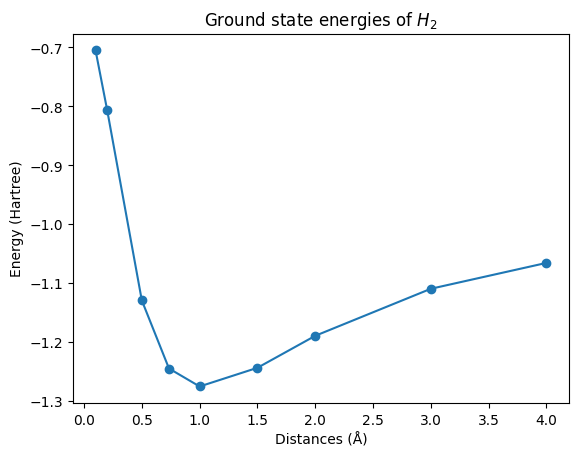

In [14]:
print(energies)
plt.plot(distances, energies, marker='o', linestyle='-')
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Ground state energies of $H_2$')
plt.show()

[[array(-0.54898867), array(-0.54898867), array(-0.54898867), array(-0.68040141), array(-0.68040141), array(-0.68040141), array(-0.67747926), array(-0.67747926), array(-0.67747926), array(-0.70515885), array(-0.70515885), array(-0.70515885), array(-0.70515893), array(-0.70515893), array(-0.70515893)], [array(-0.64798172), array(-0.64798171), array(-0.64798172), array(-0.78091117), array(-0.78091117), array(-0.78091117), array(-0.77795534), array(-0.77795534), array(-0.77795534), array(-0.80595435), array(-0.80595435), array(-0.80595435), array(-0.80595442), array(-0.80595442), array(-0.80595442)], [array(-0.96022431), array(-0.96022431), array(-0.96022431), array(-1.10232371), array(-1.1023237), array(-1.10232371), array(-1.09916382), array(-1.09916382), array(-1.09916382), array(-1.12909445), array(-1.12909445), array(-1.12909445), array(-1.12909454), array(-1.12909454), array(-1.12909454)], [array(-1.06365335), array(-1.06365335), array(-1.06365335), array(-1.2159017), array(-1.21590

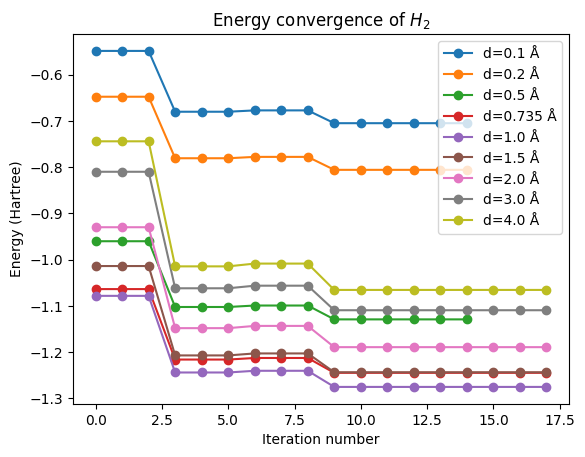

In [15]:
print(iterations)
for i in range(len(distances)):
    plt.plot(range(len(iterations[i])), iterations[i], marker='o', linestyle='-', label=f'd={distances[i]} Å')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $H_2$')
plt.show()

[0.017063622013665736, 0.01813441698323004, 0.01635424798587337, 0.0228654470120091, 0.021191929990891367, 0.019627546018455178, 0.020783240004675463, 0.02008101000683382, 0.019564957998227328]


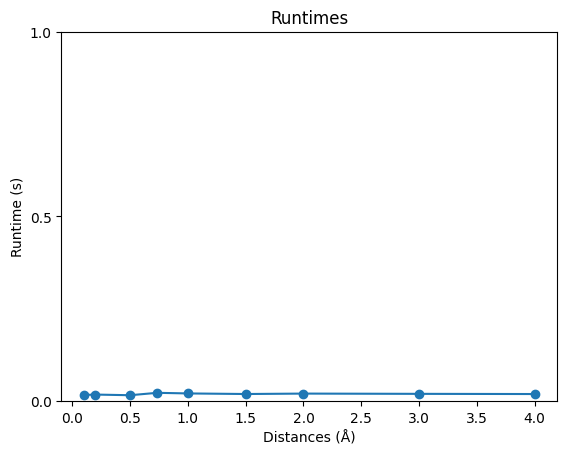

In [16]:
print(runtimes)
plt.plot(distances, runtimes, marker='o', linestyle='-', label="UCCSD")
plt.xlabel('Distances (Å)')
plt.yticks(np.arange(0, max(runtimes) + 1, 0.5))
plt.ylabel('Runtime (s)')
plt.title('Runtimes')
plt.show()

## IBM Quantum hardware

On how data was collected, checkout [./hardware/README.m](./hardware/README.md), but, in general, it is just taken from the output of `./hardware/run.ipynb` file.

This is one case of 0.735

All the runs took 13 seconds.

In [ ]:
job_times = [26.33948588371277, 25.00780177116394, 26.76294207572937, 25.58545470237732, 26.018422842025757, 27.474268674850464, 25.600987434387207, 25.030707120895386, 25.525850296020508, 26.504461526870728, 26.181912183761597, 25.583021879196167, 26.203706741333008, 27.034693717956543, 26.700570344924927, 26.038297414779663, 27.384349822998047, 26.4703209400177, 38.60314393043518, 26.014514446258545, 25.37207818031311, 26.267978191375732, 26.34986686706543, 27.095154762268066, 25.75443434715271, 27.18805694580078, 25.733174562454224, 26.0481436252594, 25.97585368156433, 25.657777309417725, 25.221819639205933, 26.70562195777893, 26.7071590423584]
energies = [-1.0412421678047858, -1.046333901573566, -1.0410840727289696, -0.9095089337096324, -0.9091354023910377, -0.9114853961913127, -0.9922459891414311, -0.9921417424597907, -0.9844034923996136, -1.0268341428251713, -1.037273123554538, -1.041203156763274, -1.0559969304495265, -1.0494574154264804, -1.0439641433872937, -1.05186810403178, -1.0484739775503584, -1.0534381555139465, -1.0534873683845691, -1.0494528738939335, -1.0496386755219675, -1.0486601860700575, -1.0520414696288611, -1.0559351678341355, -1.052714902066729, -1.0541021497722887, -1.0480200526797474, -1.048654207700061, -1.0535294170161666, -1.0521730026650182, -1.051777348736318, -1.0608939482030137, -1.047973430008839]

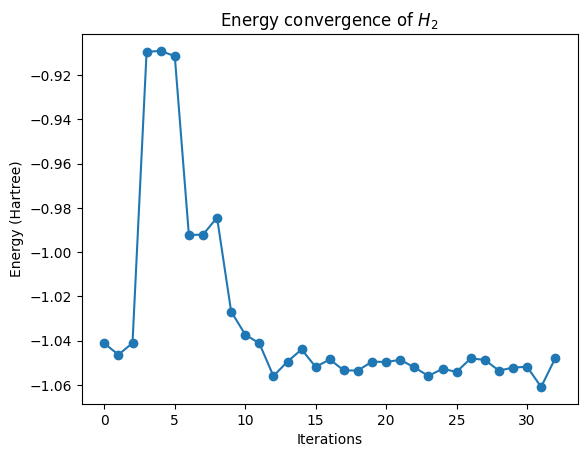

In [18]:
plt.plot(energies, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $H_2$')
plt.show()

## Trainability and expressibility

In [ ]:
ansatz = make_hydrogen_hea()
print(ansatz)

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

theta1 = Parameter('θ1')
theta2 = Parameter('θ2')
ansatz = QuantumCircuit(2)
ansatz.ry(theta1, 0)
ansatz.ry(theta2, 1)
ansatz.cx(0, 1)

n_samples = 100
rng = np.random.default_rng(42)
params = rng.uniform(0, 2*np.pi, size=(n_samples, 2))
states = []

for p in params:
    bound_circ = ansatz.assign_parameters({theta1: p[0], theta2: p[1]})
    sv = Statevector.from_instruction(bound_circ)
    states.append(sv)

from qiskit.quantum_info import state_fidelity

fidelities = []
for i in range(len(states)):
    for j in range(i+1, len(states)):
        f = state_fidelity(states[i], states[j])
        fidelities.append(f)


In [4]:
print(fidelities)

[0.4406540800501704, 0.0038004693845611138, 0.21295973401325638, 0.1953863389013968, 0.00012990077570527352, 0.10717298712163748, 0.15956463402943108, 0.08714707945113419, 0.6568594363307291, 0.9290901725254019, 0.013631155584462123, 0.5179922380860372, 0.033952660772122084, 0.06986784375461878, 0.008001139047081617, 0.025121876109825806, 0.16682170081830638, 0.1886082965680145, 0.012139117590931427, 0.025804938894800337, 0.8054216209230441, 0.1617123474223135, 0.09659742831637445, 0.3201481475169962, 0.0024223718974659835, 0.5742442523861359, 0.21674915577778062, 0.253880063177117, 0.04599757619433978, 0.8848827009437671, 0.16954464610007516, 0.7185391420632292, 0.506671319392379, 0.4784276886429156, 0.034076704572625904, 0.6006513201651629, 0.30433616503937133, 0.002221085844244127, 0.13203706442883614, 0.876772289321272, 0.42460055839420174, 0.10536086051681223, 0.9688786117052736, 0.11564750045626272, 0.0662850245792338, 0.2565374718833952, 0.005083086581702334, 0.01507558985722469

In [6]:
from qiskit.primitives import Estimator

estimator = Estimator()
# Hamiltonian: for H2, use Z, ZZ, etc. Here, simple example with Z on qubit 0
from qiskit.quantum_info import Pauli
observable = Pauli('Z'+'I')

def get_grad(theta1_val, theta2_val, delta=np.pi/2):
    # Shift theta1 up and down
    result_plus = estimator.run(ansatz, [observable], [{theta1: theta1_val + delta, theta2: theta2_val}]).result().values[0]
    result_minus = estimator.run(ansatz, [observable], [{theta1: theta1_val - delta, theta2: theta2_val}]).result().values[0]
    grad_theta1 = 0.5 * (result_plus - result_minus)

    # Shift theta2 up and down
    result_plus = estimator.run(ansatz, [observable], [{theta1: theta1_val, theta2: theta2_val + delta}]).result().values[0]
    result_minus = estimator.run(ansatz, [observable], [{theta1: theta1_val, theta2: theta2_val - delta}]).result().values[0]
    grad_theta2 = 0.5 * (result_plus - result_minus)
    return grad_theta1, grad_theta2

grads = []
for p in params:
    grads.append(get_grad([[p[0], p[1]]]))
grads = np.array(grads)
variances = np.var(grads, axis=0)
print("Gradient variances:", variances)


/tmp/ipykernel_2202201/45758687.py:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


TypeError: get_grad() missing 1 required positional argument: 'theta2_val'